In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm


amazon_df = pd.read_csv("../amz_uk_price_prediction_dataset.csv")


In [6]:
amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Crosstab Analysis:

crosstab = pd.crosstab(amazon_df['category'],amazon_df['isBestSeller'])

crosstab.sort_values(by=True, ascending=False)

crosstab_df=pd.DataFrame(crosstab)

crosstab_df['bestsellers_proportion']=crosstab_df[True]/(crosstab_df[True]+crosstab_df[False])

crosstab_df.sort_values(by='bestsellers_proportion', ascending=False)

# Categories Grocery, Smart Home Security & Lighting, and Health & Personal care have the largest bestsellers_proportion.
# Grocery category is also the one with the higher number of best seller.

isBestSeller,False,True,bestsellers_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [10]:
#Statistical Tests

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
print(chi2_statistic, chi2_p_value)

#P-value = 0 which means there is a significant association between the best seller distribution and the product category.

association(crosstab,method="cramer")

#Cramer's V = 0.12 which means there is a weak association.

36540.20270061387 0.0


0.1222829439760564

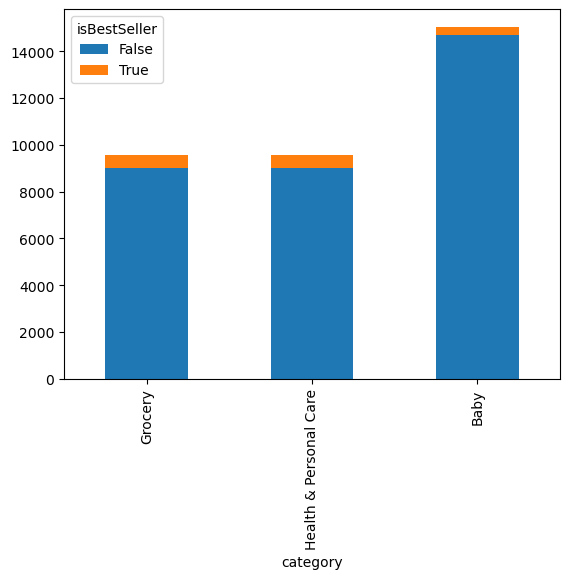

In [12]:
#Visualizations

crosstab.sort_values(by=True, ascending=False).head(3).plot(kind="bar",stacked=True);

In [11]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Preliminary Step: Remove outliers in product prices.

Q1 = amazon_df.price.quantile(0.25)
Q3 = amazon_df.price.quantile(0.75)
IQR = Q3 - Q1
price_floor_value = Q1 - (IQR*1.5) #prices cannot be negative so we won't have any low price outlier.
price_ceiling_value = Q3 + (IQR*1.5)

price_ceiling_value

amazon_cleaned_price_df = amazon_df[amazon_df['price']<price_ceiling_value]
amazon_cleaned_price_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

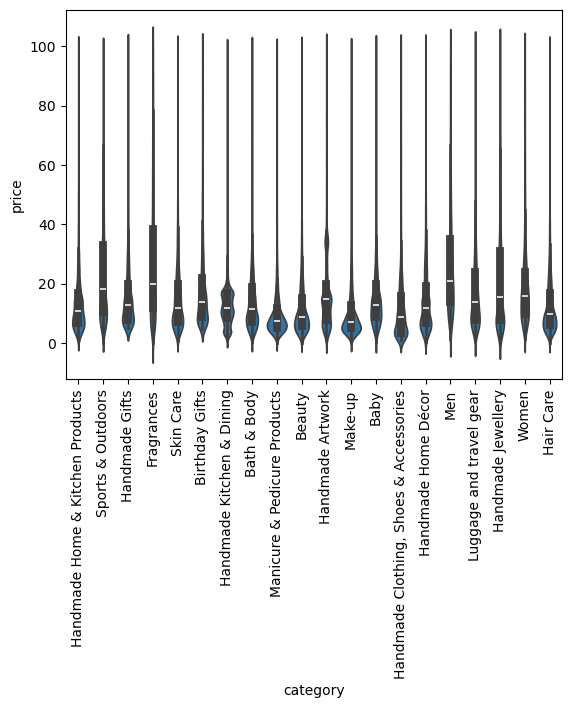

In [16]:
#Violin Plots:

top_20_cat = amazon_cleaned_price_df['category'].value_counts().head(20).index

filtered_df = amazon_cleaned_price_df[amazon_cleaned_price_df['category'].isin(top_20_cat)]

sns.violinplot(data=filtered_df, x='category', y='price');
plt.xticks(rotation=90)

amazon_cleaned_price_df['category'].value_counts().head(20)

#Categories Men and Fragrances tend to have the highest median price.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

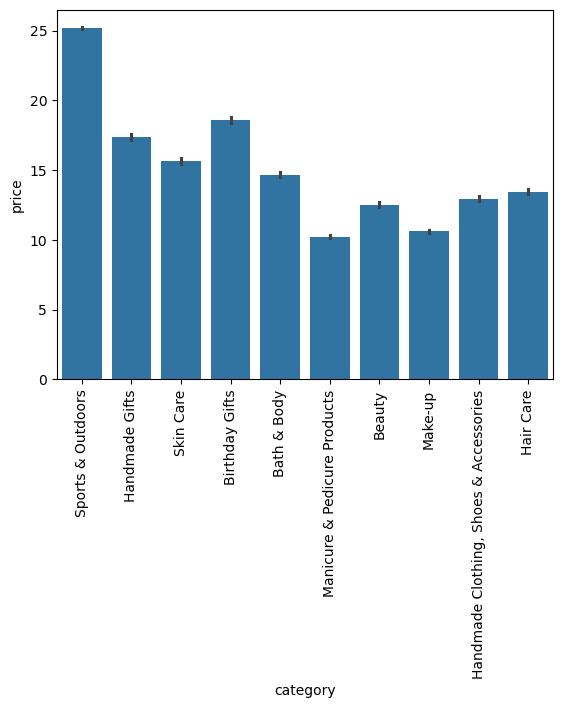

In [18]:
#Bar Charts

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.

top_10_cat = amazon_cleaned_price_df['category'].value_counts().head(10).index

top_10_cat_filtered_df = amazon_cleaned_price_df[amazon_cleaned_price_df['category'].isin(top_10_cat)]

sns.barplot(data=top_10_cat_filtered_df, x='category', y='price');
plt.xticks(rotation=90)

#Sports & Outdoor category has the hihgest average price.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

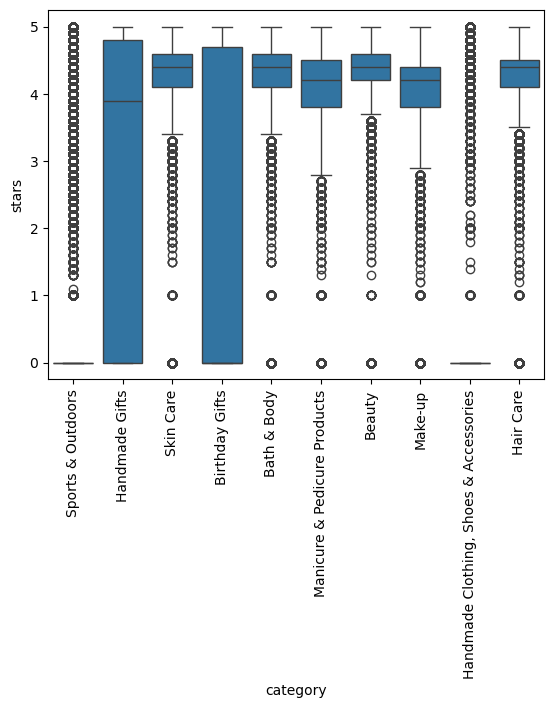

In [20]:
#Box Plots:

#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

sns.boxplot(data = top_10_cat_filtered_df, x='category', y='stars')
plt.xticks(rotation=90)

#Skin Care and Bath & Body categories seem to have the highest median rating.


In [22]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

correlation = amazon_cleaned_price_df['price'].corr(amazon_cleaned_price_df['stars'])
correlation

#There is no significant correlation between product price and its rating.

-0.07767299878181352

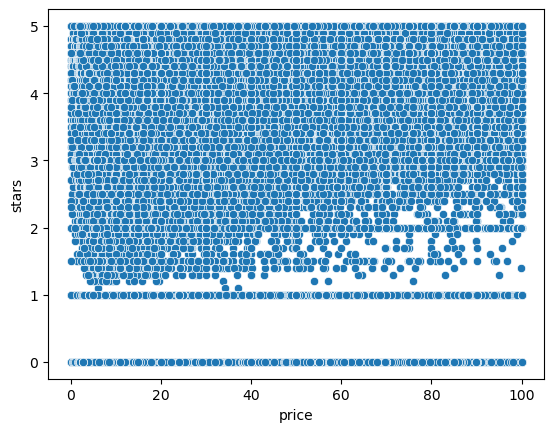

In [24]:
#Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.

sns.scatterplot(data=amazon_cleaned_price_df, x='price', y='stars');


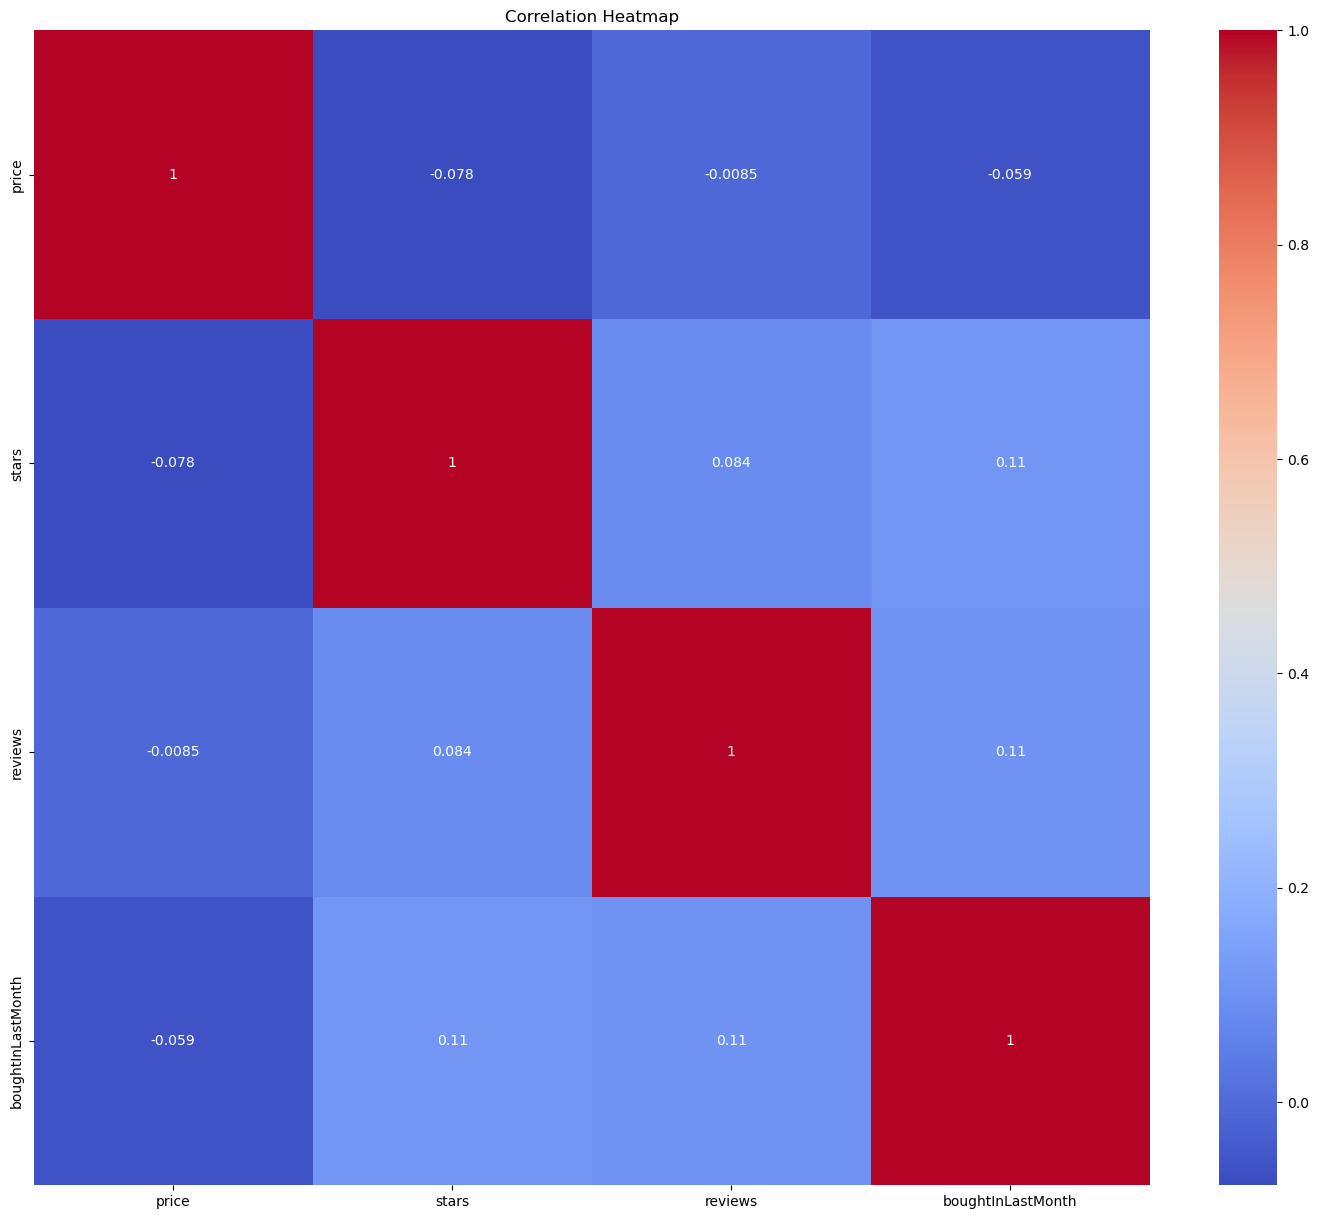

In [15]:
numerical_df=amazon_cleaned_price_df[['price','stars','reviews','boughtInLastMonth']]
correlation_matrix = numerical_df.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

#There is no significant correlation

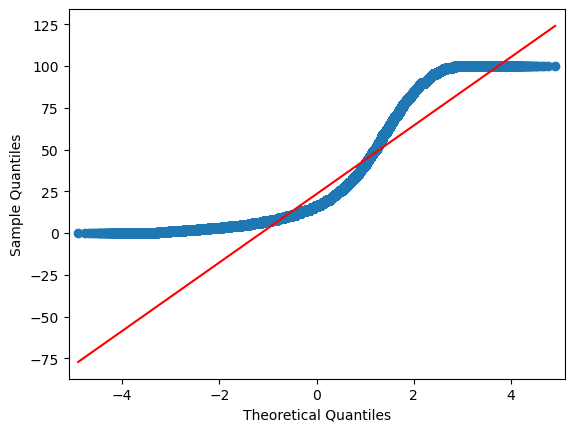

In [13]:

sm.qqplot(amazon_cleaned_price_df['price'], line='s');

#Prices are not normally distributed.